Context

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.
Attribute Information

    Age: age of the patient [years]
    Sex: sex of the patient [M: Male, F: Female]
    ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    RestingBP: resting blood pressure [mm Hg]
    Cholesterol: serum cholesterol [mm/dl]
    FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    Oldpeak: oldpeak = ST [Numeric value measured in depression]
    ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    HeartDisease: output class [1: heart disease, 0: Normal]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.manifold import TSNE
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import scipy as spy
from IPython.display import Image
import csv
from copy import deepcopy

from sklearn.decomposition import PCA, KernelPCA


#*********************************************************************************
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as smet
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
#*****************************************************************************************
from sklearn.preprocessing import MinMaxScaler
import os

In [2]:
pd.set_option('display.max_columns', 100)
print(os.getcwd())
os.listdir()

C:\Users\rudol\Programming\RCS\Gala darbs\Alternativa\RCS-nosleguma-darbs


['.ipynb_checkpoints',
 'chol_neg.png',
 'heart diseases.csv',
 'Nosleguma darbs RCS-tirs.ipynb']

<h1>Datu tabulas izveidošana<h1>

In [3]:
#### Izveidojam DF
df_BaseTable0 = pd.read_csv("heart diseases.csv")

In [4]:
df_BaseTable0.shape

(918, 12)

In [5]:
df_BaseTable0.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


<h1>Datu tīrīšana<h1>

In [6]:
df_BaseTable1 = df_BaseTable0.copy()

In [7]:
# Pārbaudīt tukšās vērtības
df_BaseTable1.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
# Kolonām pareizie tipi
df_BaseTable1.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

<h1>Datu atlasīšana<h1>

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

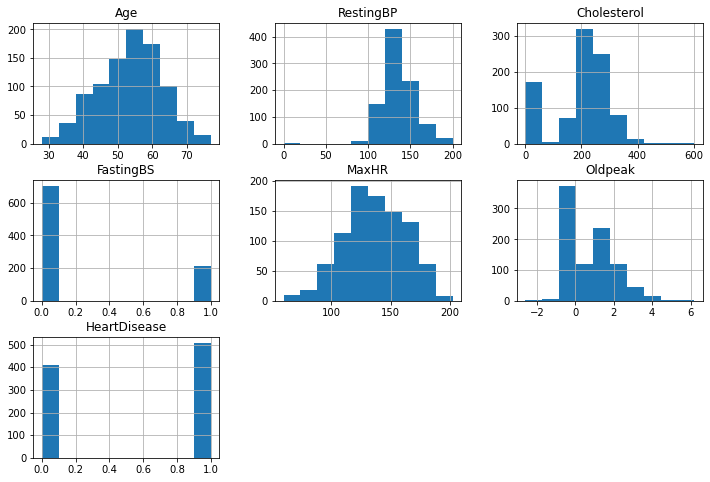

In [9]:
# Ieskats datos
df_BaseTable1.hist(figsize=(12,8))

Ieskats vērtību skaita sadalījumā. Pievērš uzmanību RestingBP(1) un Cholesterol(172) ar neiespējamām 0 vērtībām.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

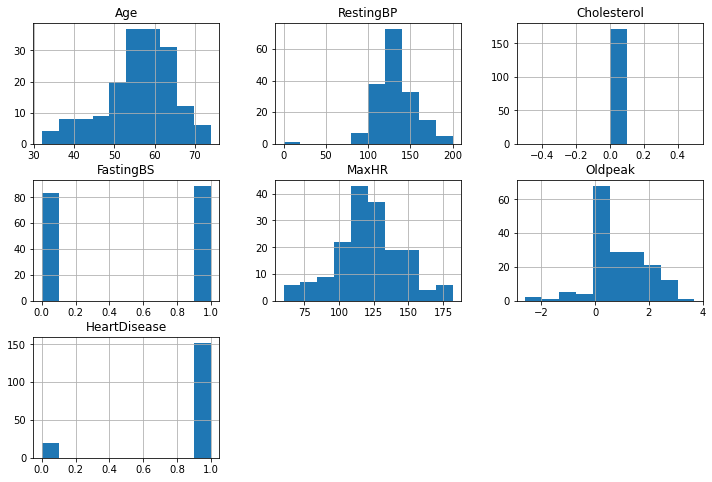

In [10]:
df_BaseTable1_chol = df_BaseTable1[df_BaseTable1["Cholesterol"] == 0]
df_BaseTable1_chol.hist(figsize=(12,8))

Neskatoties uz to, ka apakškopa ir pārliecinoši sirds slimnieku pārstāvēta(HeartDisease), vērtības bez holesterīna vērtībām izņēmu, jo tās iekļaujot Loģiskās regresijas modelī prognozējot sirds slimības holesterīna vērtības ir ar negatīvu koeficentu. Medicīnā to uzskata par riska faktoru, tāpēc paredzētu koeficentu pozitīvu vai tuvu 0. 

<img src="chol_neg.png">

In [11]:
df_BaseTable1.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [12]:
df_BaseTable1[(df_BaseTable1["RestingBP"] == 0)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [13]:
df_BaseTable1[(df_BaseTable1["Cholesterol"] == 0)].count()

Age               172
Sex               172
ChestPainType     172
RestingBP         172
Cholesterol       172
FastingBS         172
RestingECG        172
MaxHR             172
ExerciseAngina    172
Oldpeak           172
ST_Slope          172
HeartDisease      172
dtype: int64

In [14]:
df_BaseTable2 = df_BaseTable1.copy()

In [15]:
# Izmetam 0 holesterīna vērtības
filter0 = df_BaseTable2["Cholesterol"] != 0
df_BaseTable2 = df_BaseTable2[filter0]
df_BaseTable3 = df_BaseTable2.copy()

Pārvēršu uz dummie mainīgajiem

In [16]:
df_get_dummies0 = pd.get_dummies(df_BaseTable3[["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]], 
                                 drop_first=True)
df_get_dummies0.head()

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,1,1,0,0,1,0,0,0,1
1,0,0,1,0,1,0,0,1,0
2,1,1,0,0,0,1,0,0,1
3,0,0,0,0,1,0,1,1,0
4,1,0,1,0,1,0,0,0,1


In [17]:
# Izmetu pārveidotās kolonas, kā arī kolonas, kuras korelē > +-0.4 : 
# ST_Slope_Up, ST_Slope_Flat, ExerciseAngina_Y, RestingECG_ST
df_BaseTable3_temp = df_BaseTable3.copy()
df_BaseTable4 = pd.concat([df_BaseTable3_temp, df_get_dummies0], axis=1)
df_BaseTable4 = df_BaseTable4.drop(["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope",
                                   "ST_Slope_Up", "ST_Slope_Flat", "ExerciseAngina_Y", "RestingECG_ST"], axis=1)
df_BaseTable4.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal
0,40,140,289,0,172,0.0,0,1,1,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,0,1,1,0,0,0
3,48,138,214,0,108,1.5,1,0,0,0,0,1
4,54,150,195,0,122,0.0,0,1,0,1,0,1


In [18]:
df_Target1 = df_BaseTable4[['HeartDisease']]
df_Features1 = df_BaseTable4.drop(columns = ['HeartDisease'], axis =1)
df_Features1.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal
0,40,140,289,0,172,0.0,1,1,0,0,1
1,49,160,180,0,156,1.0,0,0,1,0,1
2,37,130,283,0,98,0.0,1,1,0,0,0
3,48,138,214,0,108,1.5,0,0,0,0,1
4,54,150,195,0,122,0.0,1,0,1,0,1


(11.0, 0.0)

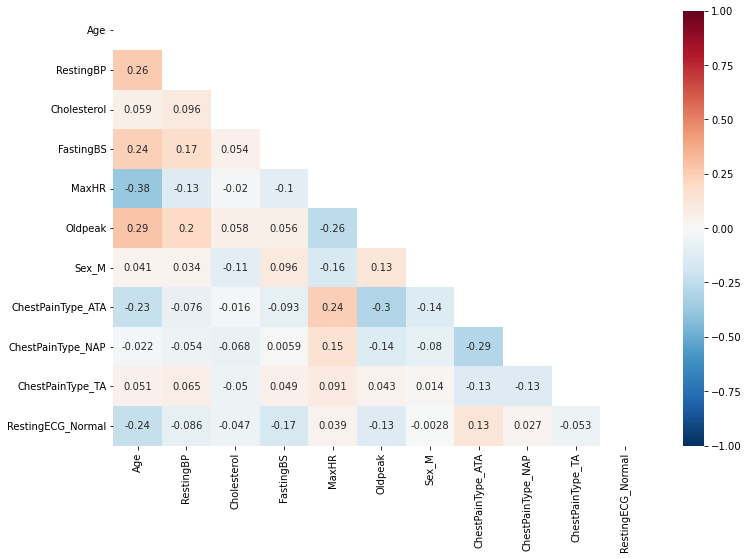

In [19]:
# Create  correlation matrix PEARSON
corr = df_Features1.corr()

# Create mask
mask = np.triu(np.ones_like(corr, dtype=bool))
corr_mask = corr.mask(mask)

f, ax = plt.subplots(figsize=(12, 8))

fig2 = sns.heatmap(corr_mask,cmap='RdBu_r',vmin=-1,vmax=1, annot = True)
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))

In [20]:
df_BaseTable2.ST_Slope.value_counts()

Flat    354
Up      349
Down     43
Name: ST_Slope, dtype: int64

<AxesSubplot:>

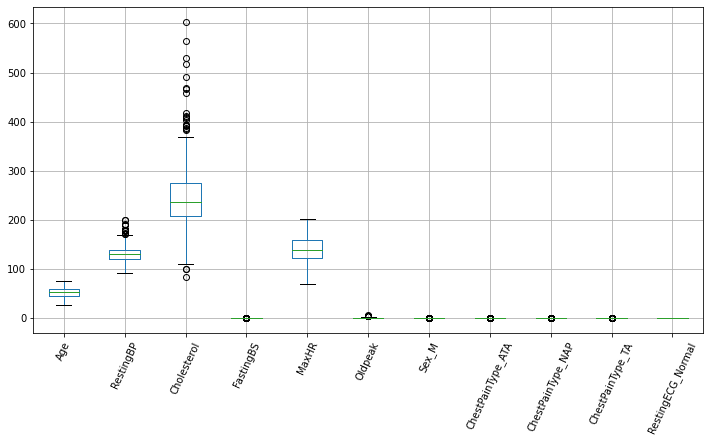

In [21]:
df_Features1.boxplot(rot = 65, figsize=(12,6))

Standartizēt

In [22]:
scaler = StandardScaler()
mat_X_scaled = scaler.fit_transform(df_Features1).copy()
type(mat_X_scaled)

numpy.ndarray

<AxesSubplot:>

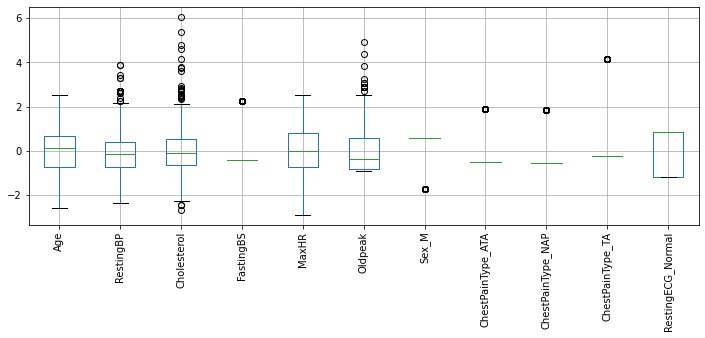

In [23]:
df_X_scaled = pd.DataFrame(mat_X_scaled, columns =df_Features1.columns)
df_X_scaled.boxplot(rot=90, figsize=(12,4))

<h1>Apmācam modeli<h1>

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_X_scaled, 
                                                    df_Target1, 
                                                    test_size=0.25, 
                                                    stratify= df_Target1, 
                                                    random_state=1)

In [25]:
# solver, start_num, end_num -> dict{num: [st_nobide]}
def make_clf_in_range(start, end):
    clf_data_dic = {}
    for num in np.arange(start, end):
        clf1 = LogisticRegression(solver='saga', C = 0.0001, penalty = "l2", max_iter=2000, random_state=10,
                                 class_weight = 'balanced',fit_intercept=True)
        clf2 = RandomForestClassifier(n_estimators=num+80, random_state=1)
        clf3 = KNN(num)

        eclf1 = VotingClassifier(estimators=[('lr', clf1), 
                                         ('rf', clf2), 
                                         ('knn', clf3)], voting='soft')

        eclf1 = eclf1.fit(X_train,np.ravel(y_train))
        y_pred = eclf1.predict(X_test)

        confus_matrix = smet.confusion_matrix(y_test, y_pred)
        TN = confus_matrix[0,0]
        FP = confus_matrix[0,1]
        FN = confus_matrix[1,0]
        TP = confus_matrix[1,1]

        Accuracy = (TP + TN)/(TP +FP +FN +TN)

        TPR_sensitivity = TP/(TP +FN)
        FPR = FP/(TN +FP)
        FNR_missRate = FN/(TP + FN)

        fallout, sensitivity, thresholds = smet.roc_curve(y_test, y_pred)
        t_dict= {"fallout": fallout,
                 "sensitivity": sensitivity,
                 "thresholds": thresholds}
        df_fall_sens_thres = pd.DataFrame(t_dict)

        auc = smet.auc(fallout,sensitivity)
        
        score = cross_validate(eclf1, X_train, np.ravel(y_train), cv=5)
        score_std = score["test_score"].std()
        
        
        clf_data_dic[num] = [Accuracy, auc, FNR_missRate, FPR, score_std]
    return clf_data_dic

In [26]:
clf_data = make_clf_in_range(1,41)

In [27]:
df_clf_values = pd.DataFrame(clf_data)
df_clf_values = df_clf_values.transpose()
df_clf_values.columns = ["Accuracy", "Area_under_curve", "False_negative_rate", "False_positive_rate", "Cross_val_STD"]
df_clf_values.head(10)

,Accuracy,Area_under_curve,False_negative_rate,False_positive_rate,Cross_val_STD
1,0.770053,0.771841,0.191011,0.265306,0.026504
2,0.828877,0.830028,0.146067,0.193878,0.038059
3,0.839572,0.840748,0.134831,0.183673,0.030900
4,0.855615,0.857086,0.112360,0.173469,0.023978
5,0.844920,0.845850,0.134831,0.173469,0.020438
6,0.855615,0.855022,0.157303,0.132653,0.021005
7,0.834225,0.835130,0.146067,0.183673,0.048389
8,0.828877,0.829512,0.157303,0.183673,0.035657
9,0.834225,0.834614,0.157303,0.173469,0.049061
10,0.828877,0.829512,0.157303,0.183673,0.033702


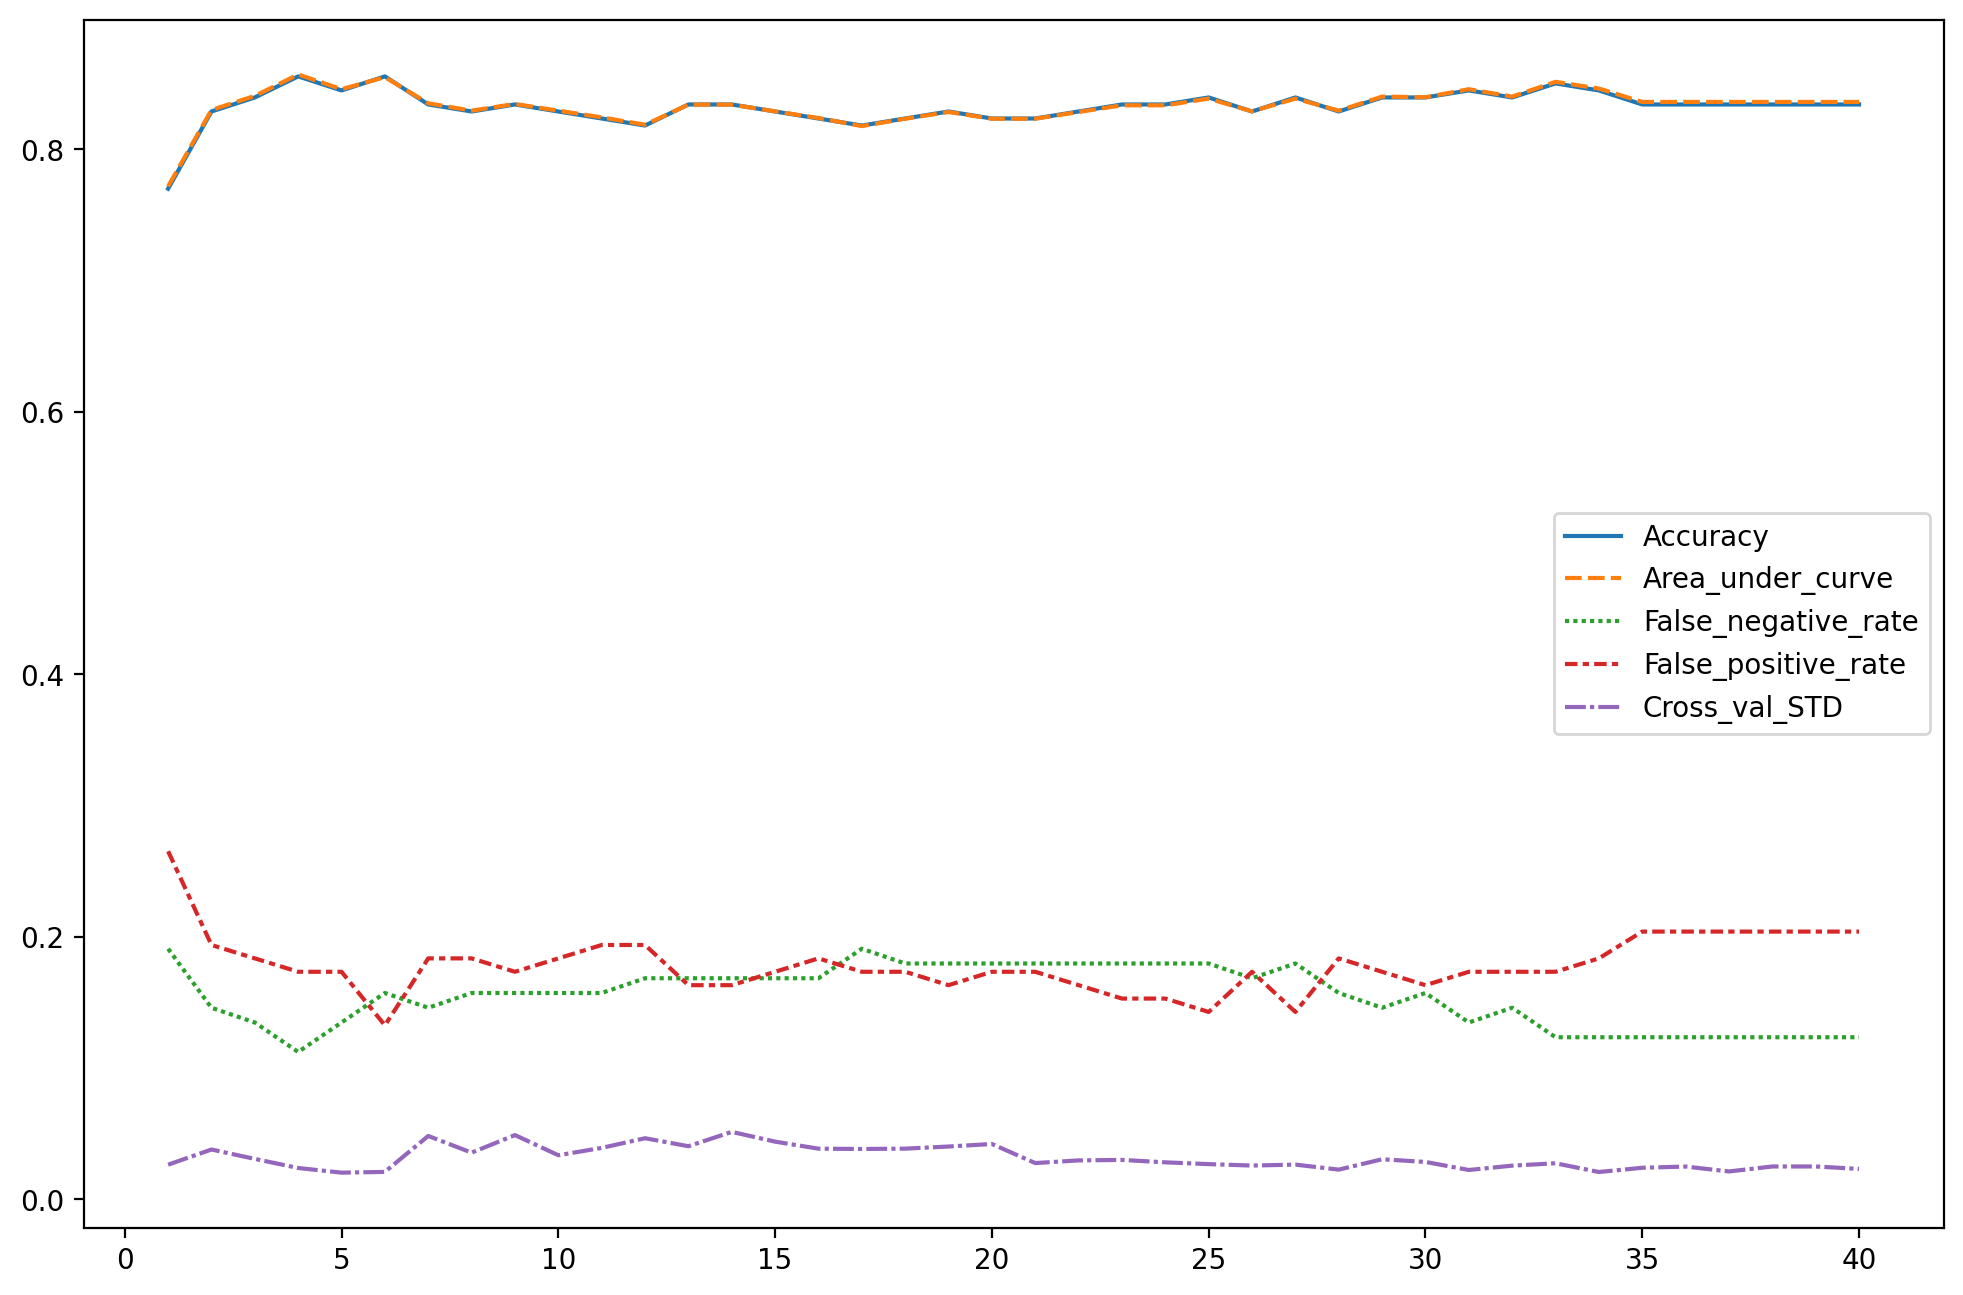

In [28]:
plt.figure(figsize=(12,8), dpi=200)
sns.lineplot(data=df_clf_values)
plt.xticks()
plt.show()

Manuāli pārbaudu izmantojot loģistisko regresiju, lai varētu vekt koeficentu analīzi.

In [29]:
clf1 = LogisticRegression(solver='saga', C = 0.0001, penalty = "l2", max_iter=2000, random_state=10,
                             class_weight = 'balanced',fit_intercept=True)
clf1 = clf1.fit(X_train,np.ravel(y_train))
y_pred = clf1.predict(X_test)

In [30]:
confus_matrix = smet.confusion_matrix(y_test, y_pred)
TN = confus_matrix[0,0]
FP = confus_matrix[0,1]
FN = confus_matrix[1,0]
TP = confus_matrix[1,1]

Accuracy = (TP + TN)/(TP +FP +FN +TN)

TPR_sensitivity = TP/(TP +FN)
FPR = FP/(TN +FP)
FNR_missRate = FN/(TP + FN)

fallout, sensitivity, thresholds = smet.roc_curve(y_test, y_pred)
t_dict= {"fallout": fallout,
         "sensitivity": sensitivity,
         "thresholds": thresholds}
df_fall_sens_thres = pd.DataFrame(t_dict)

auc = smet.auc(fallout,sensitivity)


print("Accuracy"," " ,Accuracy)
print("auc"," ",auc)
print("FNR_missRate"," ",FNR_missRate)
print("FPR"," ",FPR)

Accuracy   0.7967914438502673
auc   0.7978674615913781
FNR_missRate   0.1797752808988764
FPR   0.22448979591836735


In [31]:
Cross validation

SyntaxError: invalid syntax (1661630549.py, line 1)

In [ ]:
score = cross_validate(clfa1, X_train, np.ravel(y_train), cv=5)

In [ ]:
# score_str = " ".join(list(score["test_score"].astype(str)))
score["test_score"].std()

In [ ]:
feature_names = df_Features1.columns.values
coef= clf1.coef_[0]

plt.figure(30)
plt.figure(figsize=(8,5))

plt.bar(feature_names,coef)
plt.xticks(feature_names, rotation=80)
plt.title("Neatkarīgo mainīgo ietekme modelī")